In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg


In [2]:
sigma_l = 0.05; sigma_r = 0.05; sigma_p = 0.1
left_angular_required = 1.5; right_angular_required = 2;
r = 0.25; w = 0.5;
X0 = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 0]]);

def ParticleFilterPropogate(Xt,t):
    Xt1 = []
    
    left_angular = np.random.normal(left_angular_required,sigma_l,len(Xt[0]))
    right_angular = np.random.normal(right_angular_required,sigma_r,len(Xt[0]))

    for i in range(len(Xt[0])):
        ohm_dot = np.array([[0, -(r/w)*(right_angular[i]-left_angular[i]), (r/2)*(right_angular[i]+left_angular[i])],
                           [(r/w)*(right_angular[i]-left_angular[i]), 0, 0],
                           [0, 0, 0]])
        
        temp = np.dot(X0,linalg.expm(t*ohm_dot))
        Xt1.append([temp[0][2], temp[1][2]])
        
    return np.transpose(np.array(Xt1))
    
def ParticleFilterUpdate(Xt,zt):
    total = 0
    Weights = []
    zt_t = zt.reshape(2,1)
    for i in range(len(Xt[0])):

        temp = ((zt-Xt[:,i]) @ (zt_t-Xt[:,[i]]))/(sigma_p**2)
        Weights.append(np.exp(-(1/2)*temp[0]))
        total += Weights[i]

    Xt_index = np.random.choice(len(Xt[0]),len(Xt[0]),p=Weights/total) 
    Xt_posterior = []

    for i in Xt_index:
        Xt_posterior.append(Xt[:,i])

    return np.transpose(Xt_posterior)



Mean =  [1.09188539 3.07998876]
Covariance = 
 [[0.38552298 0.03581007]
 [0.03581007 0.01742232]] 



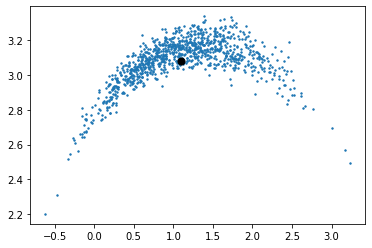

In [3]:
#Part e
Xt_10 = ParticleFilterPropogate(np.array([np.zeros(1000),np.zeros(1000)]),10)
mean = np.mean(Xt_10,axis = 1)
print("Mean = ",mean)
print("Covariance = \n",np.cov(Xt_10),"\n")
plt.scatter(Xt_10[0,:],Xt_10[1,:],s=2)
plt.scatter(mean[0],mean[1],s=50,color ='black')


Mean @ t( 5 ) =  [1.64952866 1.19180707]
Covariance @ t( 5 ) = 
 [[ 0.0206806  -0.01655075]
 [-0.01655075  0.01609735]] 


Mean @ t( 10 ) =  [1.09707258 3.07782916]
Covariance @ t( 10 ) = 
 [[0.3958538  0.03742791]
 [0.03742791 0.01776421]] 


Mean @ t( 15 ) =  [-0.76875254  3.12164174]
Covariance @ t( 15 ) = 
 [[0.49865188 0.54358791]
 [0.54358791 0.84058929]] 


Mean @ t( 20 ) =  [-1.36784904  1.60615393]
Covariance @ t( 20 ) = 
 [[ 0.3560747  -0.28814235]
 [-0.28814235  1.72574737]] 



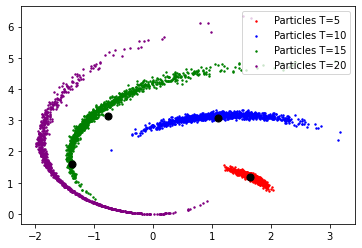

In [5]:
#Part f
col = ['red','blue','green','purple']
leg = ['Particles T=5','Particles T=10','Particles T=15','Particles T=20']
for i in range(1,5):
    Xt_t = ParticleFilterPropogate(np.array([np.zeros(1000),np.zeros(1000)]),5*i)
    mean = np.mean(Xt_t,axis = 1)
    print("\nMean @ t(",5*i,") = ",mean)
    print("Covariance @ t(",5*i,") = \n",np.cov(Xt_t),"\n")
    plt.scatter(Xt_t[0,:],Xt_t[1,:],s=2,color = col[i-1],label=leg[i-1])
    plt.scatter(mean[0],mean[1],s=50,color='black')
    plt.legend()



Mean @ t( 5 ) =  [1.62900989 1.23230059]
Covariance @ t( 5 ) = 
 [[ 0.00543226 -0.00346827]
 [-0.00346827  0.00415604]] 


Mean @ t( 10 ) =  [1.04724464 3.13955992]
Covariance @ t( 10 ) = 
 [[0.00878248 0.00084983]
 [0.00084983 0.00264155]] 


Mean @ t( 15 ) =  [-0.97884587  3.21076747]
Covariance @ t( 15 ) = 
 [[0.00513666 0.00402255]
 [0.00402255 0.00886275]] 


Mean @ t( 20 ) =  [-1.64812288  1.19236243]
Covariance @ t( 20 ) = 
 [[ 0.00198975 -0.00318474]
 [-0.00318474  0.00702297]] 



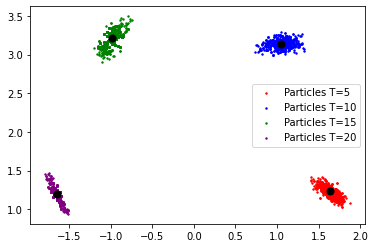

In [6]:
#Part g
col = ['red','blue','green','purple']
leg = ['Particles T=5','Particles T=10','Particles T=15','Particles T=20']

zt = np.array([[1.6561, 1.2847],[1.0505, 3.1059],[-0.9875, 3.2118],[-1.6450, 1.1978]])
for i in range(1,5):
    Xt_t = ParticleFilterPropogate(np.array([np.zeros(1000),np.zeros(1000)]),5*i)
    Xt_posterior = ParticleFilterUpdate(Xt_t,zt[i-1])
    mean = np.mean(Xt_posterior,axis = 1)
    print("\nMean @ t(",5*i,") = ",mean)
    print("Covariance @ t(",5*i,") = \n",np.cov(Xt_posterior),"\n")
    plt.scatter(Xt_posterior[0,:],Xt_posterior[1,:],s=2,color = col[i-1],label=leg[i-1])
    plt.scatter(mean[0],mean[1],s=50,color='black')
    plt.legend()
    